# KMEANS

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers = 4, random_state=42, cluster_std=1)

X.shape

(500, 2)

In [26]:
y.shape

(500,)

In [27]:
X[:5]

array([[-7.68905443,  6.62034649],
       [-9.57651383, -6.93440446],
       [ 6.82968177,  1.1648714 ],
       [-2.90130578,  7.55077118],
       [-5.67841327, -7.28818497]])

In [28]:
y[:5]

array([3, 2, 1, 0, 2])

In [29]:
import pandas as pd

df = pd.DataFrame([X[:,0], X[:,1], y]).T
df.columns = ["x1", "x2", "label"]
df["label"] = df["label"].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


[Text(0.5, 1.0, 'original data')]

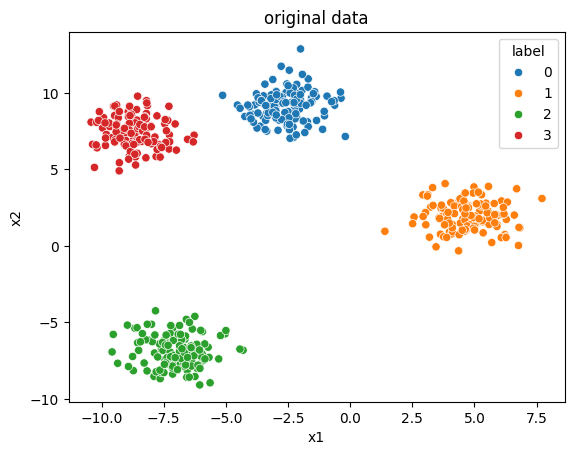

In [34]:
import seaborn as sns

ax = sns.scatterplot(data = df, x="x1", y="x2", hue="label", palette="tab10")
ax.set(title="original data")

In [37]:
X = df.drop("label", axis = 1)
X

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185
...,...,...
495,-7.438972,8.248157
496,-2.586299,9.355438
497,-7.215412,-5.211088
498,-7.402350,-5.831100


## Feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

In [40]:
scaled_X.mean(), scaled_X.std()

(np.float64(-1.8207657603852568e-17), np.float64(1.0))

<Axes: >

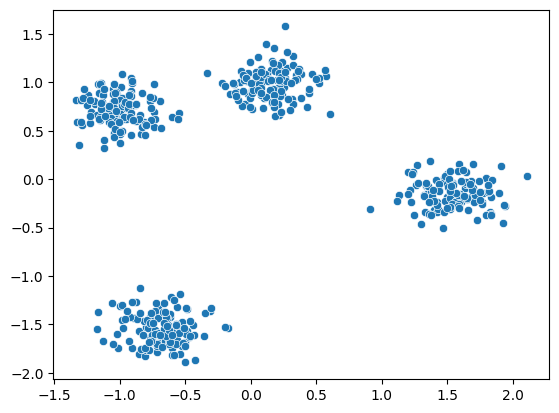

In [41]:
sns.scatterplot(x = scaled_X[:,0], y = scaled_X[:,1])

## k-means clustering

In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


clusters = range(1,10)

kmean = KMeans(n_clusters = 3, n_init=10).fit(scaled_X)
print(kmean.inertia_)

116.0956785275553


[Text(0.5, 1.0, 'Elbow plot to find k'),
 Text(0.5, 0, 'number of clusters'),
 Text(0, 0.5, 'Within sum of squared distances to cluster centers')]

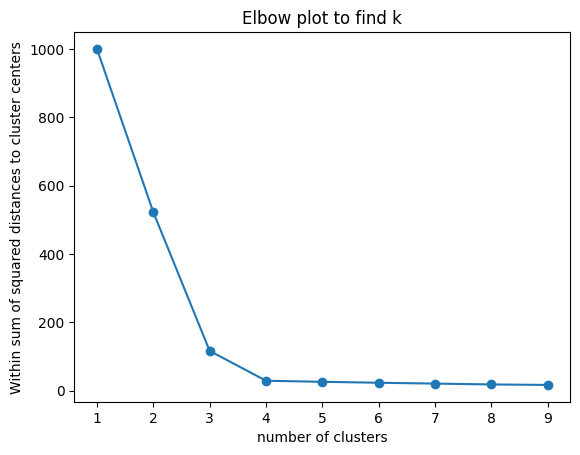

In [53]:
fig, ax = plt.subplots(1)

sum_squared_distances = [KMeans(k, n_init=10).fit(scaled_X).inertia_ for k in clusters]
ax.plot(clusters, sum_squared_distances, "-o")
ax.set(
    title="Elbow plot to find k",
    xlabel="number of clusters",
    ylabel="Within sum of squared distances to cluster centers",
)

## Silhouette score

[Text(0.5, 1.0, 'Silhouette plot'),
 Text(0.5, 0, 'k clusters'),
 Text(0, 0.5, 'Silhouette score')]

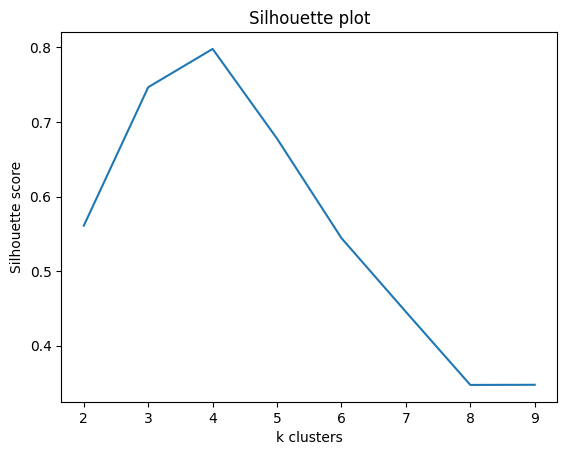

In [60]:
from sklearn.metrics import silhouette_score

fig, ax = plt.subplots(1)

kmeans = [KMeans(k, n_init=10).fit(scaled_X) for k in clusters]
silhouette_list = [
    silhouette_score(scaled_X, kmean.labels_)
    for kmean in kmeans[1:]
]

ax.plot(clusters[1:], silhouette_list)

ax.set(title="Silhouette plot", xlabel="k clusters", ylabel="Silhouette score")


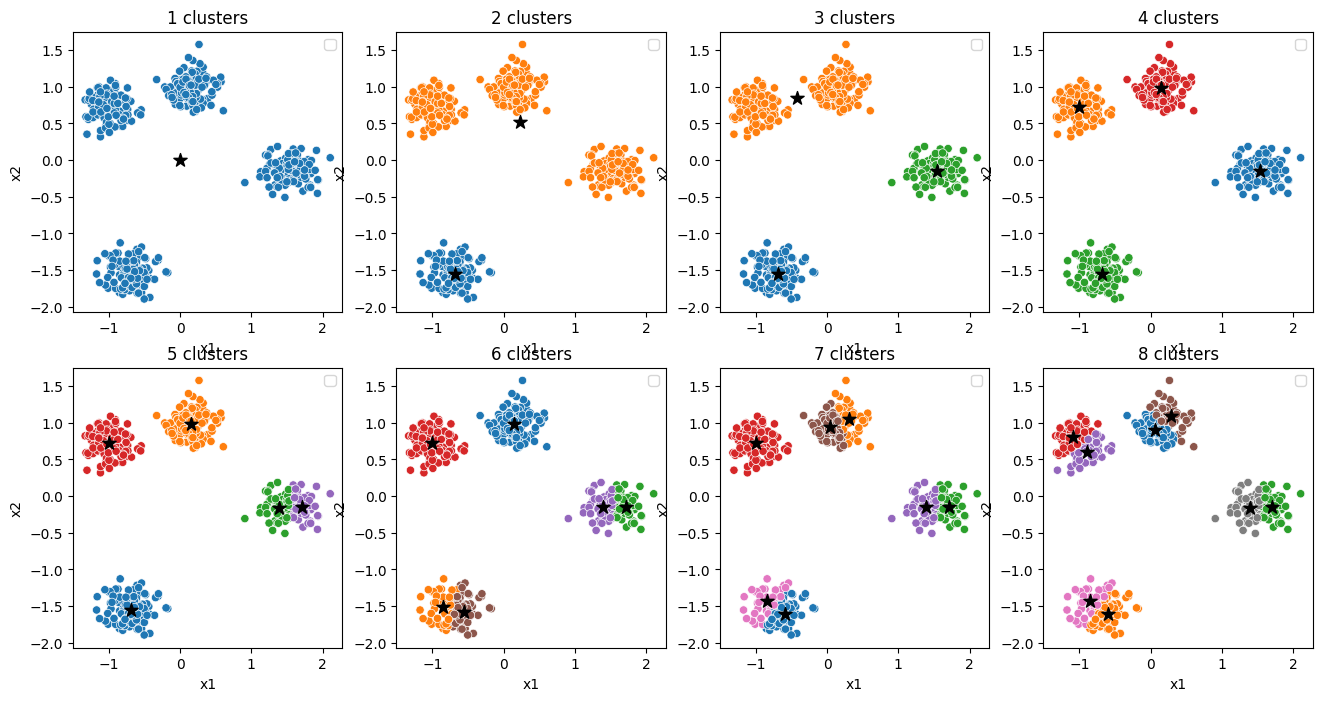

In [71]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(
        data=df_plot,
        x="x1",
        y="x2",
        hue="label",
        ax=ax,
        palette="tab10"
    )
    ax.scatter(cluster_centers[:,0], cluster_centers[:,1], s=100, marker="*", color="black", label="centroid")
    ax.legend([])
    ax.set(title = f"{i+1} clusters")
